# Capstone Project - EDA

### Prerequisites

In [4]:
#Loading Libraries
#!pip install plotnine
#!pip install imblearn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from scipy import stats

## Exploratory Data Analysis (EDA)

In [2]:
#Load HAM10000 data
df=pd.read_csv('M:/archive/HAM10000_metadata.csv')

In [4]:
#View the data
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [5]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [6]:
#Describe the data
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [7]:
# No. of rows & colomns
df.shape

(10015, 7)

In [8]:
#Find the duplicates

df.duplicated().sum()

0

* No duplicate

In [9]:
#Find null values
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

* The null value according to missing values in age feature

In [10]:
#Datatypes
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

### Categorical Feature Analysis

In [11]:
#Categorical Feature Analysis - Target
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

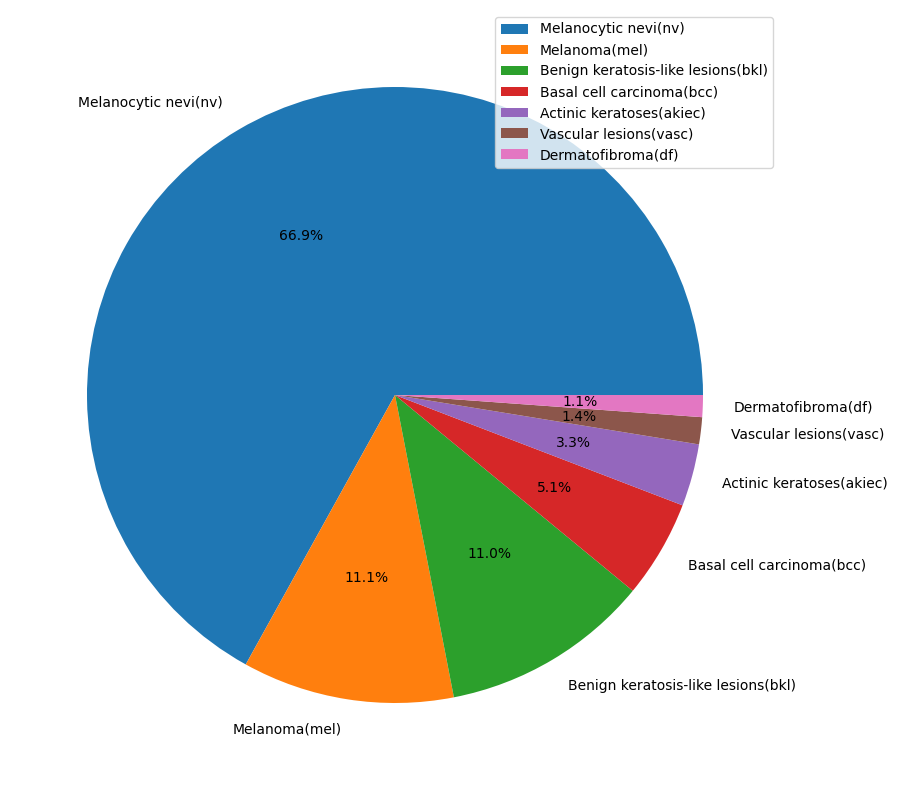

In [3]:
fig = plt.figure(figsize=(20,10))
plt.pie(df['dx'].value_counts(),autopct="%1.1f%%",labels=['Melanocytic nevi(nv)','Melanoma(mel)','Benign keratosis-like lesions(bkl)','Basal cell carcinoma(bcc)','Actinic keratoses(akiec)','Vascular lesions(vasc)','Dermatofibroma(df)'])
plt.legend();

* Melanocytic nevi is the dominant class in the dataset about (67%). 
* The least represented classes are Dermatofibroma lesions and Vascular skin lesions,
* We can observe unbalance between the different classes of skin lesions

<Figure size 1500x1000 with 0 Axes>

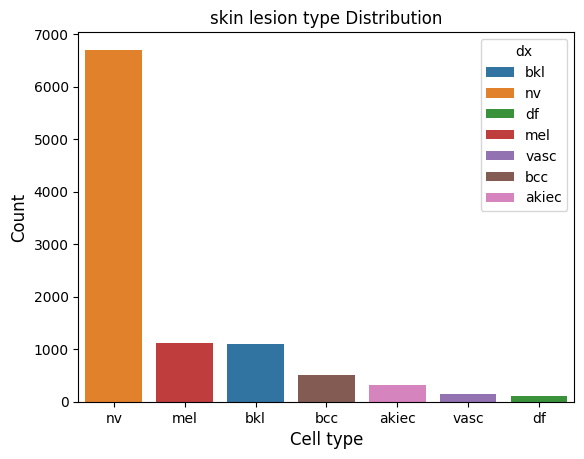

In [19]:
#Data distribtions

fig = plt.figure(figsize=(15,10))
categorical_list = ["dx"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = 'dx',data = df_categoric ,order = df['dx'].value_counts().index,hue = "dx",dodge=False)
    #sns.countplot(x = i, data = df_categoric,hue = "dx")
    plt.xlabel('Cell type', size=12)
    plt.ylabel('Count', size=12)
    plt.title('skin lesion type Distribution')

* We can observe unbalance between the different classes of skin lesions

<Figure size 1500x1000 with 0 Axes>

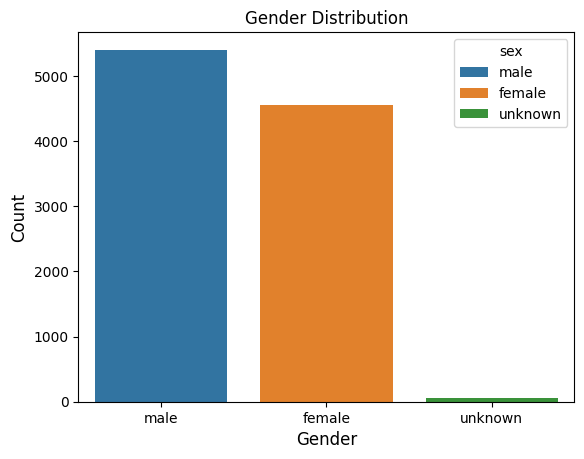

In [20]:
fig = plt.figure(figsize=(15,10))
categorical_list = ["sex"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = 'sex',data = df_categoric ,order = df['sex'].value_counts().index,hue = "sex",dodge=False)
    #sns.countplot(x = i, data = df_categoric,hue = "dx")
    plt.xlabel('Gender', size=12)
    plt.ylabel('Count', size=12)
    plt.title('Gender Distribution')

* The null entries are only related to the Age feature
* The samples are mostly Male participants, approximately 55%, not a significant difference between Genders

<Figure size 2500x1000 with 0 Axes>

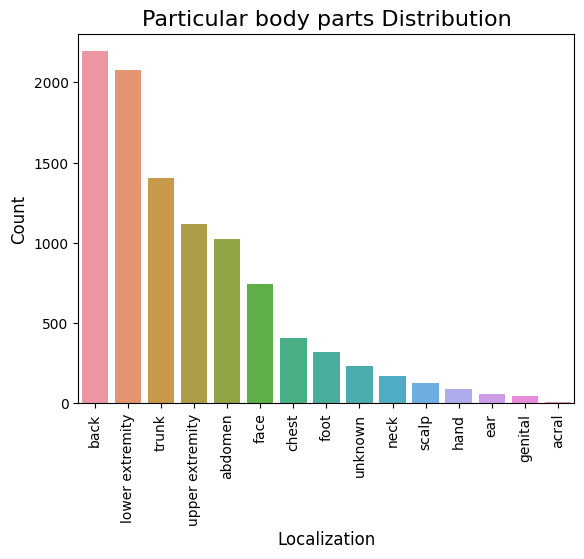

In [21]:
plt.figure(figsize=(25,10))
categorical_list = ["localization"]
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = 'localization',data = df_categoric ,order = df['localization'].value_counts().index,dodge=False)
    #sns.countplot(x = i, data = df_categoric,hue = "dx")
    plt.xticks(rotation=90)
    plt.xlabel('Localization', size=12)
    plt.ylabel('Count', size=12)
    plt.title('Particular body parts Distribution', size=16)

* Back, trunk, upper and lower extremities, and abdomen are the most common locations

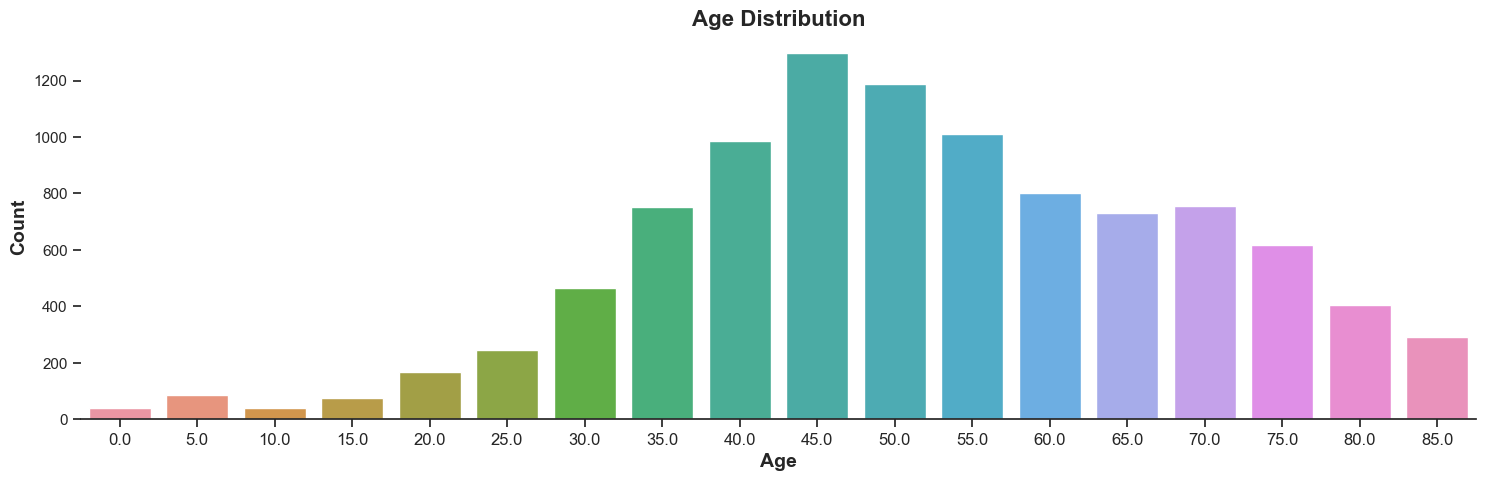

In [7]:
plt.figure(figsize=(18,5))
sns.set(style="ticks", font_scale = 1)
ax = sns.countplot(data = df,x='age')
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 12)
ax.set_xlabel('Age',fontsize = 14,weight = 'bold')
ax.set_ylabel('Count',fontsize = 14,weight = 'bold')
plt.title('Age Distribution', fontsize = 16,weight = 'bold');

* Many of the participants are between the ages of 40 and 55, and the median age of the samples is 45.
After age 25, there's a dramatic increase in the number of samples taken; they double by age 30 and nearly triple by age 35.
The sample size is relatively stable between ages 60 and 70, then begins to decline again at age 75.